In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn import preprocessing as pre
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [6]:
def dataset():
    data = pd.read_csv('final-dataset.csv')
    X = data.drop(columns=['Signal','Label','Hurst Component'])
    y = data['Label']
    feature_names = X.columns
    return X, y, feature_names

In [2]:
parameters = {'criterion':('gini', 'entropy'), 'class_weight':('balanced', 'balanced_subsample'), 'max_features':('auto', 'sqrt','log2')}

In [7]:
def get_feature_names(selector, feature_names):
    mask = selector.get_support() #list of booleans
    new_features = [] # The list of your K best features
    for bool, feature in zip(mask, feature_names):
        if bool:
            new_features.append(feature)
    return new_features

In [8]:
def feature_scaling_min_max(X):
    min_max_scaler = pre.MinMaxScaler()
    X = min_max_scaler.fit_transform(X)
    return X

In [6]:
def feature_scaling_basic(X):
    return pre.scale(X)

In [9]:
from sklearn.metrics import confusion_matrix
def performance_measures(x_test, y_test):
    y_true = y_test
    y_pred = clf.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp + fn)
    return sensitivity, specificity

In [8]:
max_score = 0
best_params = {}
best_k = 2
best_val_score = 0
selected_names = []
best_sensitivity = 0
best_specificity = 0

for k in range(2,10):
    X, y, feature_names = dataset()
    X = feature_scaling_min_max(X)
    selector = SelectKBest(chi2, k=k)
    X_new = selector.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
    x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
    clf = RandomForestClassifier(random_state=0)
    clf = GridSearchCV(clf, parameters)
    clf.fit(X_train, y_train)
    names = get_feature_names(selector, feature_names)
    val_score = clf.score(x_val, y_val)
    score = clf.score(x_test, y_test)
    sensitivity, specificity = performance_measures(x_test, y_test)
    if(score > max_score):
        max_score = score
        best_k = k
        best_params = clf.best_params_
        best_val_score = val_score
        selected_names = names
        best_sensitivity = sensitivity
        best_specificity = specificity
    print("Passed ", k)

print("Test Score is ", max_score)
print("Best params are ", best_params)
print("Best k is ", best_k)
print("names are ", selected_names)
print("Val score is ", best_val_score)
print("Sensitivity ", sensitivity)
print("Specificity ", specificity)

Passed  2
Passed  3
Passed  4
Passed  5
Passed  6
Passed  7
Passed  8
Passed  9
Test Score is  0.8952380952380953
Best params are  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'log2'}
Best k is  8
names are  ['Zero Crossings', 'Frequency (Hz)', 'Delta (µV² /Hz)', 'Alpha (µV² /Hz)', 'Beta (µV² /Hz)', 'Gamma (µV² /Hz)', 'Skewness', 'Hjorth Mobility']
Val score is  0.9047619047619048
Sensitivity  0.8942307692307693
Specificity  0.8867924528301887


In [9]:
max_score = 0
best_params = {}
best_k = 2
best_val_score = 0
selected_names = []

for k in range(2,10):
    X, y, feature_names = dataset()
    X = feature_scaling_min_max(X)
    selector = SelectKBest(f_classif, k=k)
    X_new = selector.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
    x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
    clf = RandomForestClassifier(random_state=0)
    clf = GridSearchCV(clf, parameters)
    clf.fit(X_train, y_train)
    val_score = clf.score(x_val, y_val)
    names = get_feature_names(selector, feature_names)
    score = clf.score(x_test, y_test)
    sensitivity, specificity = performance_measures(x_test, y_test)
    if(score > max_score):
        max_score = score
        best_k = k
        best_params = clf.best_params_
        best_val_score = val_score
        selected_names = names
        best_sensitivity = sensitivity
        best_specificity = specificity
    print("Passed ", k)

print("Test Score is ", max_score)
print("Best params are ", best_params)
print("Best k is ", best_k)
print("Val score is ", best_val_score)
print("Names are ", selected_names)
print("Sensitivity ", sensitivity)
print("Specificity ", specificity)

Passed  2
Passed  3
Passed  4
Passed  5
Passed  6
Passed  7
Passed  8
Passed  9
Test Score is  0.9
Best params are  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'log2'}
Best k is  8
Val score is  0.8952380952380953
Names are  ['Zero Crossings', 'Frequency (Hz)', 'Alpha (µV² /Hz)', 'Beta (µV² /Hz)', 'Gamma (µV² /Hz)', 'Skewness', 'Hjorth Mobility', 'Spectral Entropy']
Sensitivity  0.8942307692307693
Specificity  0.8867924528301887


In [10]:
max_score = 0
best_params = {}
best_k = 2
best_val_score = 0
selected_names = []

for k in range(2,10):
    X, y, feature_names = dataset()
    X = feature_scaling_min_max(X)
    selector = SelectKBest(mutual_info_classif, k=k)
    X_new = selector.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
    x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
    clf = RandomForestClassifier(random_state=0)
    clf = GridSearchCV(clf, parameters)
    clf.fit(X_train, y_train)
    val_score = clf.score(x_val, y_val)
    names = get_feature_names(selector, feature_names)
    score = clf.score(x_test, y_test)
    sensitivity, specificity = performance_measures(x_test, y_test)
    if(score > max_score):
        max_score = score
        best_k = k
        best_params = clf.best_params_
        best_val_score = val_score
        selected_names = names
        best_sensitivity = sensitivity
        best_specificity = specificity
    print("Passed ", k)

print("Test Score is ", max_score)
print("Best params are ", best_params)
print("Best k is ", best_k)
print("Val score is ", best_val_score)
print("names are ", selected_names)
print("Sensitivity ", sensitivity)
print("Specificity ", specificity)

Passed  2
Passed  3
Passed  4
Passed  5
Passed  6
Passed  7
Passed  8
Passed  9
Test Score is  0.9333333333333333
Best params are  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto'}
Best k is  6
Val score is  0.9238095238095239
names are  ['Zero Crossings', 'Theta (µV² /Hz)', 'Alpha (µV² /Hz)', 'Beta (µV² /Hz)', 'Gamma (µV² /Hz)', 'Variance']
Sensitivity  0.8942307692307693
Specificity  0.9056603773584906


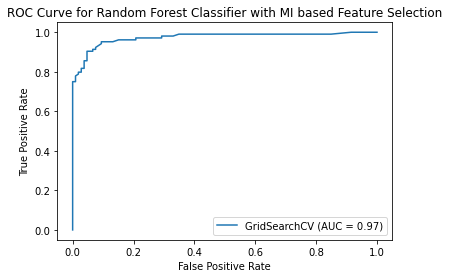

In [15]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm

X, y, feature_names = dataset()
X = feature_scaling_min_max(X)
selector = SelectKBest(mutual_info_classif, k=6)
X_new = selector.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
clf = RandomForestClassifier(random_state=0)
clf = GridSearchCV(clf, parameters)
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, x_test, y_test) 
plt.title("ROC Curve for Random Forest Classifier with MI based Feature Selection")
plt.show()  

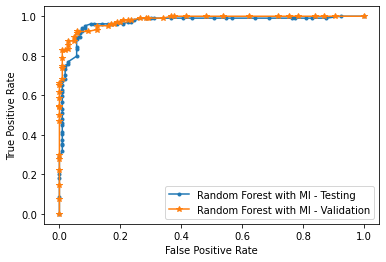

In [20]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y, feature_names = dataset()
X = feature_scaling_min_max(X)
selector = SelectKBest(mutual_info_classif, k=6)
X_new = selector.fit_transform(X, y)
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
clf = RandomForestClassifier(random_state=0)
clf = GridSearchCV(clf, parameters)
clf.fit(X_train, y_train)
# predict probabilities
lr_probs1 = clf.predict_proba(x_test)
lr_probs2 = clf.predict_proba(x_val)
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
lr_probs2 = lr_probs2[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr1_auc = roc_auc_score(y_test, lr_probs1)
lr2_auc = roc_auc_score(y_val, lr_probs2)
# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr1_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_val, lr_probs2)
# plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest with MI - Testing')
pyplot.plot(lr_fpr2, lr_tpr2, marker='*', label='Random Forest with MI - Validation')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()